Problem 1 - 4: Stream Measurements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("lab3_excel.xlsx")

In [4]:
new_df = pd.DataFrame()

new_df['Xm'] = (np.array(df['x (m)'].iloc[1:])+np.array(df['x (m)'].iloc[:-1]))/2
new_df['A'] = np.array(new_df['Xm'])*np.array(df['d (m)'].iloc[1:])
new_df['V'] = (np.array(df['v (m/s)'].iloc[1:])+np.array(df['v (m/s)'].iloc[:-1]))/2
new_df['Q'] = new_df['V']*new_df['A']

In [6]:
new_df

,Xm,A,V,Q
0,0.2,0.042,0.210,0.00882
1,0.6,0.240,0.430,0.10320
2,1.0,0.660,0.550,0.36300
3,1.4,0.980,0.635,0.62230
4,1.8,1.188,0.615,0.73062
5,2.2,1.430,0.590,0.84370
6,2.6,1.612,0.725,1.16870
7,3.0,1.650,0.865,1.42725
8,3.4,1.802,0.770,1.38754
9,3.8,1.710,0.665,1.13715


In [8]:
print('total streamflow ', new_df['Q'].sum(), 'cubic meters per second')

total streamflow  8.37692 cubic meters per second


Problem 5: Plot of Depth vs Distance across Stream

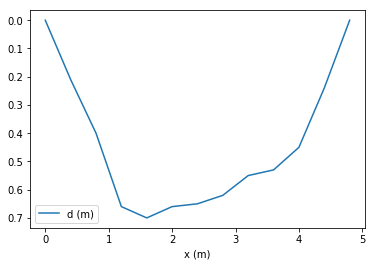

In [14]:
df.plot(x='x (m)', y='d (m)')
plt.gca().invert_yaxis()

Problem 6: Discharge vs Distance

Text(2.05, 1.5, 'local max')

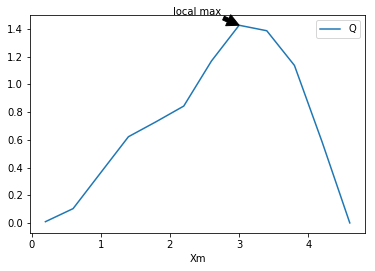

In [37]:
ax = new_df.plot(x='Xm', y='Q')
ymax = max(new_df['Q'])
xpos = list(new_df['Q']).index(ymax)
xmax = new_df['Xm'][xpos]

ax.annotate('local max', xy=(xmax, ymax), xytext=(2.05, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.9),
            )

Part 2: Baseflow seperation 6-11

In [62]:
xlsx = pd.ExcelFile("lab3_excel.xlsx")

column_names = xlsx.parse(sheet_name='Sheet2').columns
isotopes = xlsx.parse(sheet_name='Sheet2', skiprows = 1)
isotopes.columns = column_names

isotopes['t'] = list(range(1,12))

print('Time to peak discharge is: 4 hours')

Time to peak discharge is: 4 hours


discharge in mm/hour, summed over the interval

In [72]:
total_Q_mm_10hr = (isotopes['Q (m3/s)']*1000000000*60*60).sum()

cumulative rainfall in the watershed, summed over the interval

In [73]:
total_P_mm_10hr = 35*(15*1000*1000*1000*1000)

In [75]:
print('total runoff ratio', total_Q_mm_10hr/total_P_mm_10hr)

total runoff ratio 0.6205714285714286
